# Some Tips for JupyterNotebook : 

-Scroll up and down your cells with your Up and Down keys.

-Press A or B to insert a new cell above or below the active cell.

-M will transform the active cell to a Markdown cell.

-Y will set the active cell to a code cell.

-D + D (D twice) will delete the active cell.

-Z will undo cell deletion.

-Hold Shift and press Up or Down to select multiple cells at once. With multiple cells selected, Shift + M will merge your selection.

# Some tests for text and running code 


In [ ]:
print("hello world !")

In [ ]:
x = 3
for i in range(0, 5):
    print(i + x) 

Salut text intermediaire 

In [ ]:
import time 
time.sleep(3)

Salut 

Je tape ce texte pour tester le Markdown 

Ca marche bien !

In [ ]:
string = "Bonjour comment ca va ? "
print(string)

# Algorithm(s) (test) not used for the app 


In [ ]:
max_score = 10
min_score = 0
critical = 0

def input_score(string, list_input):
    score = int(input("Rentrez votre " + string + "\t"))
    list_input.append(score)
    return score

# max_score_is_bad is a boolean
def find_factor(score,name, epsilon, max_score_is_bad):
    if (max_score_is_bad): 
        if (abs(max_score - score) < epsilon):
            print(name + " est un facteur important du modele")
    else :
        if (score < epsilon):
            print(name + " est un facteur important du modele")


input_list = []
age     = input_score("age", input_list)
fatigue = input_score("fatigue", input_list)
douleur = input_score("douleur", input_list)
sommeil = input_score("sommeil", input_list)

del input_list[0] # we don t consider the age as an input for this time 
    
print(input_list)

# 1st exemple 
if ((max_score - fatigue) < 2 or sommeil < 2 or (max_score - douleur) < 2):
    critical = 1
    print("You should try to do this or that ")
elif (fatigue > 2 and fatigue < 5):
    print("Keep going it s better")
else : 
    print("Great job you seems to be good ! ")
    
# 2nd exemple 
for score in input_list:
    if score < 2:
        critical = 1
        print("You should try to do this or that #2")
        
        
        
# do the correlation between the age and the (back) pain for example
if (douleur > 7):
    if (age > 60):
        print("Try to stretch yourself ")
    else:
        print("Change your position when you are working or whatever")

find_factor(fatigue, "fatigue", 2, 1)
find_factor(douleur, "douleur", 2, 1)
find_factor(sommeil, "sommeil", 2, 0)

# CLUSTER TEST ON DATASET

# CREATE THE DATASET 

In [2]:
import numpy as np
import pandas as pd
import names
import gender_guesser.detector as gender


#defining a seed

np.random.seed(42) # extract always the same sample

detector = gender.Detector()

#generating first col
names_col = [names.get_first_name() for i in range(800)]

#names
df = pd.DataFrame(data=names_col,
                columns=["name"])

sexe_col = [0 if (detector.get_gender(names_col[i]) == "male" or detector.get_gender(names_col[i]) == "mostly_male")
            else 1 for i in range(800)]

#sexes
df1 = pd.DataFrame(data=sexe_col,
                  columns=["sexe"])

#age 
df2 = pd.DataFrame(np.random.randint(15, 90, size=800),
                  columns=["age"])

#health
df3 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["general health"]) 

#activity
df4 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["ease of activity"])

#breath
df5 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["breathing problem"])

#fatigue 
df6 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["fatigue"])

#pain
df7 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["overall pain"])

#concentration
df8 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["concentration"])

#sleep
df9 = pd.DataFrame(np.random.randint(0, 11, size=800),
                  columns=["sleep quality"])

df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)


final_tab = df


final_tab=df[["name", "sexe", "age", "general health", 
              "ease of activity", "breathing problem", "fatigue", "overall pain", "concentration", "sleep quality"]]


X = final_tab.sample(frac=1)
X.sample(frac=1).to_csv("test1.csv",index=False)

ModuleNotFoundError: No module named 'names'

In [ ]:
file = pd.read_csv("test1.csv")
file.head(20)

# USING FORMULA FOR SEVERITY SCORE 

# Output the severity score for each person 


In [3]:
# to calculate the severity score the formula is :
# 50%(fatigue)+15%(10–mood) + 15%(10–ease of activity) + 20%(10–general health)

#the mood of the formula is in this example the sleep quality 
severity=[]
for i in df.index:
    severity_score = 50/100 * df["fatigue"][i] + 15/100 * (10 - df["sleep quality"][i]) + 15/100 * (10 - df["ease of activity"][i]) + 20/100 * (10 - df["general health"][i])
    severity.append(severity_score)
    
df_severity = pd.DataFrame(data=severity, columns=["severity score"])

df = pd.concat([df, df_severity], axis=1)

final_tab = df


final_tab=df[["name", "sexe", "age", "general health", 
              "ease of activity", "breathing problem", "fatigue", "overall pain", "concentration", "sleep quality", "severity score"]]


X = final_tab.sample(frac=1)
X.sample(frac=1).to_csv("test1_severity_score.csv",index=False)

file = pd.read_csv("test1_severity_score.csv")
file.head(20)

NameError: name 'df' is not defined

# CONSIDER THAT WE HAVE 50 DAYS OF SERVERITY SCORE FOR ONE USER AND WE TRY TO PREDICT IT

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoRegResults


# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

ss = file["severity score"].head(100)
ss.plot() 
pyplot.show()

X = difference(ss.values)

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
window_size = 6
model = AutoReg(train, lags=6)
model_fit = model.fit()

# save coefficients
coef = model_fit.params
np.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
np.save('man_data.npy', lag)
# save the last ob
np.save('man_obs.npy', [ss.values[-1]])


# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# load model
model = AutoRegResults.load('ar_model.pkl')
data = np.load('ar_data.npy')
last_ob = np.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)


# TRY PREDICTION OF SS USING FAMOUS EXAMPLE "HOUSE PRICE PREDICTION"
    

In [9]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

ModuleNotFoundError: No module named 'termcolor'

In [13]:
#generating first col
names_col = ["Alice", "Bob", "Emma", "Paul", "Francoise", "Stef", "Daniela", "Antoine",
             "Julie", "Patrick", "Lars", "Thomas", "Marc", "Jules"]

#names
df = pd.DataFrame(data=names_col,
                columns=["name"])

sexe_col = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]

#sexes
df1 = pd.DataFrame(data=sexe_col,
                  columns=["sexe"])

#age 
age =    [24, 19, 64, 59, 75, 60, 25, 50, 70, 83, 47, 49, 28, 21]
df2 = pd.DataFrame(data=age, 
                  columns=["age"])

#health
health =  [8, 9, 6, 7, 5, 5, 8, 6, 4, 3, 6, 7, 8, 8]
df3 = pd.DataFrame(data=health,
                  columns=["general health"]) 

#activity
activity= [3, 10, 3, 7, 3, 1, 8, 5, 6, 0, 2, 3, 5, 9]
df4 = pd.DataFrame(data=activity,
                  columns=["ease of activity"])

#breath
breath=   [2, 1, 3, 3, 8, 6, 0, 4, 5, 10, 6, 6, 2, 1]
df5 = pd.DataFrame(data=breath,
                  columns=["breathing problem"])

#fatigue 
fatigue = [0, 1, 3, 3, 8, 6, 1, 4, 8, 10, 4, 5, 5, 4]
df6 = pd.DataFrame(data=fatigue,
                  columns=["fatigue"])

#pain
pain =    [3, 2, 8, 3, 4, 3, 1, 3, 8, 9, 3, 1, 0, 3]
df7 = pd.DataFrame(data=pain,
                  columns=["overall pain"])

#concentration
concentr= [2, 7, 7, 6, 3, 5, 10, 7, 3, 2, 8, 8, 7, 7]
df8 = pd.DataFrame(data=concentr,
                  columns=["concentration"])

#sleep
sleep =   [10, 8, 9, 4, 9, 5, 9, 8, 5, 4, 7, 5, 3, 8]
df9 = pd.DataFrame(data=sleep,
                  columns=["sleep quality"])

df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)

severity=[]
for i in df.index:
    severity_score = 50/100 * df["fatigue"][i] + 15/100 * (10 - df["sleep quality"][i]) + 15/100 * (10 - df["ease of activity"][i]) + 20/100 * (10 - df["general health"][i])
    severity.append(severity_score)
    
df_severity = pd.DataFrame(data=severity, columns=["severity score"])

df = pd.concat([df, df_severity], axis=1)

final_tab = df

final_tab=df[["name", "sexe", "age", "general health", 
              "ease of activity", "breathing problem", "fatigue", "overall pain", "concentration", "sleep quality", "severity score"]]


X = final_tab.sample(frac=1)
X.sample(frac=1).to_csv("train_handmade.csv",index=False)

df = pd.read_csv("train_handmade.csv", 
                 usecols=["sexe", "age", "general health", "ease of activity",
                          "breathing problem", "fatigue", "overall pain", 
                          "concentration", "sleep quality", "severity score"])

df

,sexe,age,general health,ease of activity,breathing problem,fatigue,overall pain,concentration,sleep quality,severity score
0,1,25,8,8,0,1,1,10,9,1.35
1,0,50,6,5,4,4,3,7,8,3.85
2,0,28,8,5,2,5,0,7,3,4.70
3,1,24,8,3,2,0,3,2,10,1.45
4,0,83,3,0,10,10,9,2,4,8.80
5,0,60,5,1,6,6,3,5,5,6.10
6,1,75,5,3,8,8,4,3,9,6.20
7,0,47,6,2,6,4,3,8,7,4.45
8,1,70,4,6,5,8,8,3,5,6.55
9,0,21,8,9,1,4,3,7,8,2.85


In [7]:
df.dropna(inplace=True)

print(df.isnull().sum())

sexe                 0
age                  0
general health       0
ease of activity     0
breathing problem    0
fatigue              0
overall pain         0
concentration        0
sleep quality        0
severity score       0
dtype: int64


In [8]:
df.describe()

,sexe,age,general health,ease of activity,breathing problem,fatigue,overall pain,concentration,sleep quality,severity score
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,0.500000,52.90000,6.100000,4.600000,4.200000,4.400000,4.400000,5.20000,7.100000,4.225000
std,0.527046,22.77645,1.911951,3.169297,3.119829,3.438346,2.836273,2.65832,2.330951,2.611646
min,0.000000,19.00000,3.000000,0.000000,0.000000,0.000000,1.000000,2.00000,4.000000,1.000000
25%,0.000000,31.25000,5.000000,3.000000,2.250000,1.500000,3.000000,3.00000,5.000000,1.950000
50%,0.500000,59.50000,6.000000,4.000000,3.500000,3.500000,3.000000,5.50000,8.000000,3.675000
75%,1.000000,68.50000,7.750000,6.750000,5.750000,7.500000,7.000000,7.00000,9.000000,6.175000
max,1.000000,83.00000,9.000000,10.000000,10.000000,10.000000,9.000000,10.00000,10.000000,8.800000


In [11]:
df['severity score'] = pd.to_numeric(df['severity score'], errors = 'coerce')
df["severity score"] = df["severity score"].astype('int64')


<AxesSubplot:>

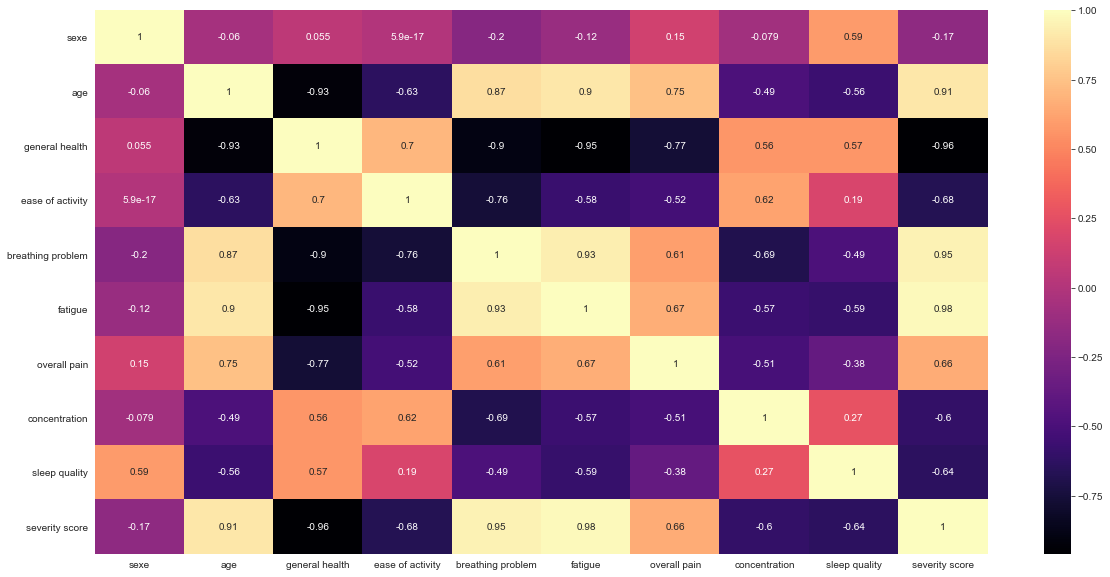

In [10]:
sb.heatmap(df.corr(), annot=True, cmap="magma")

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


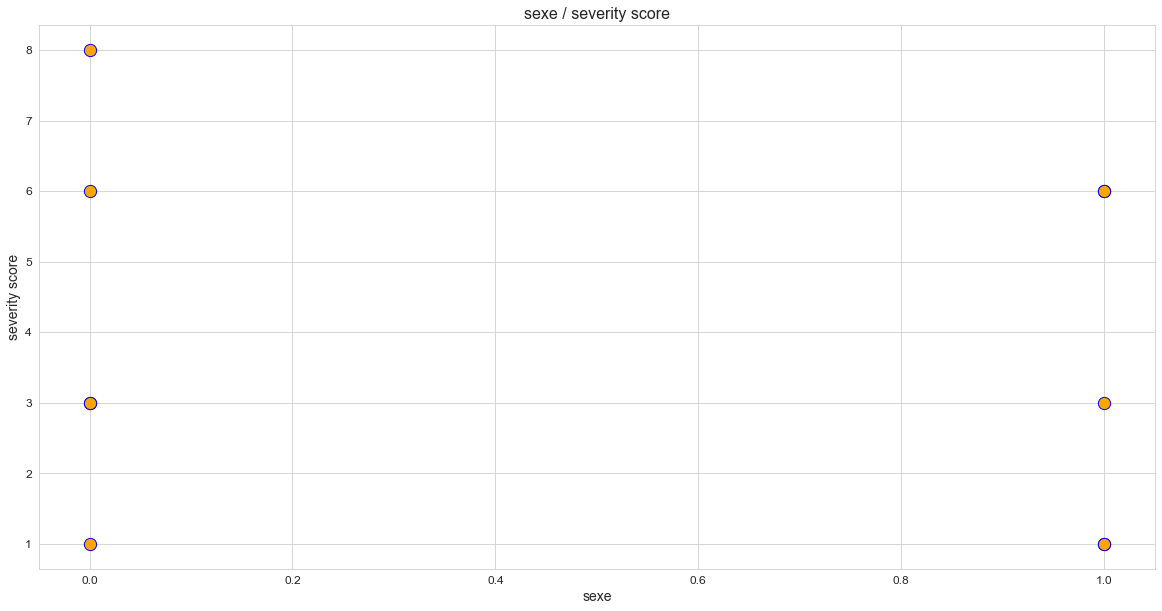

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


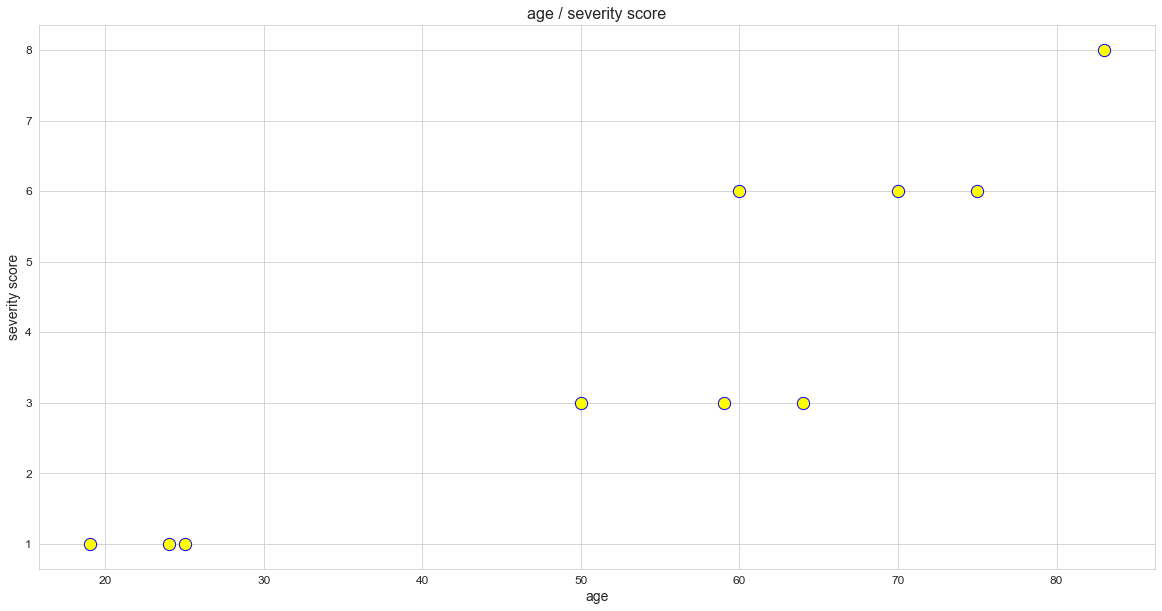

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


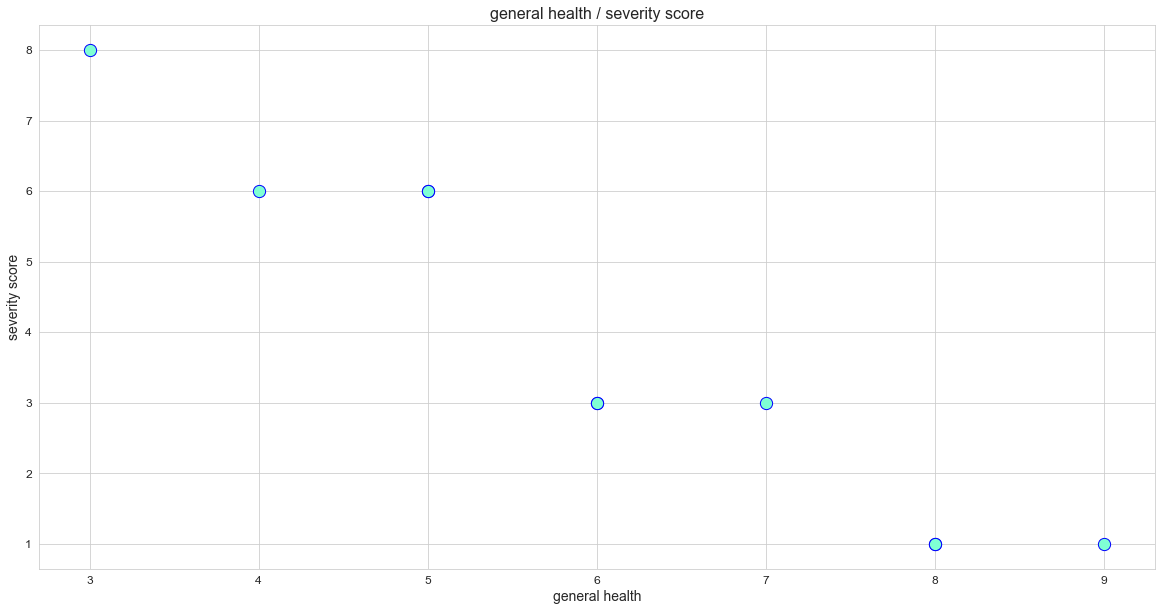

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


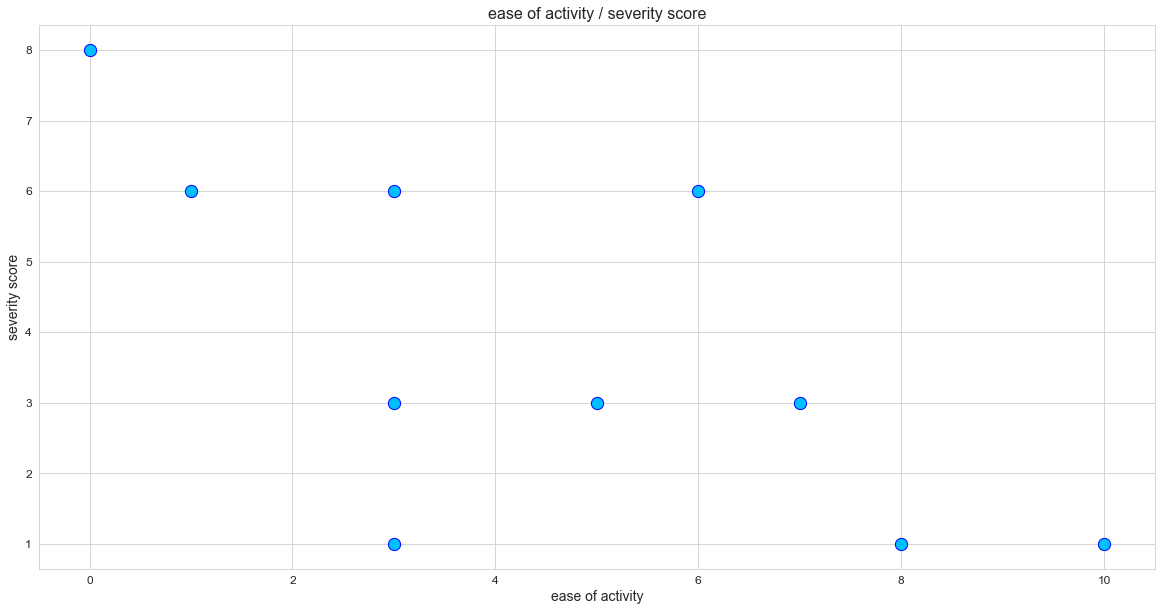

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


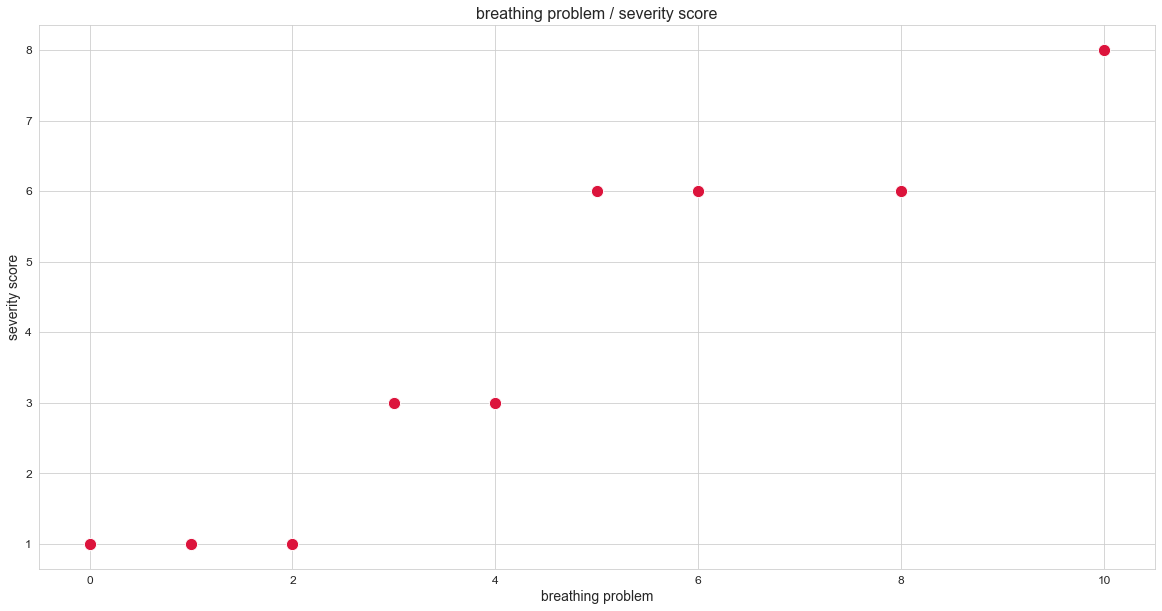

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


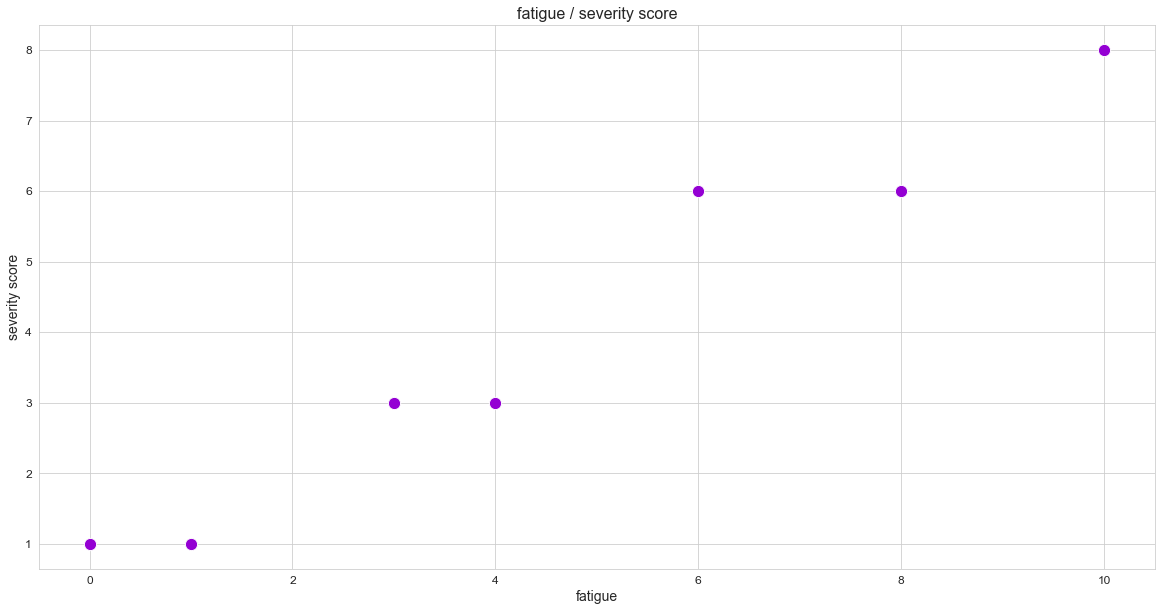

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


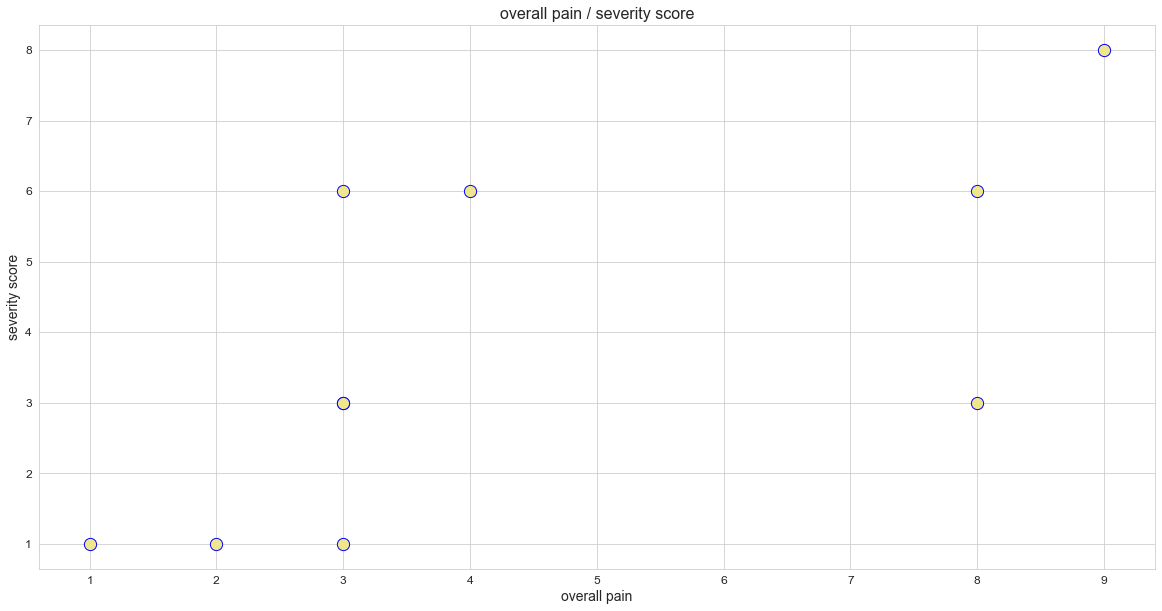

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


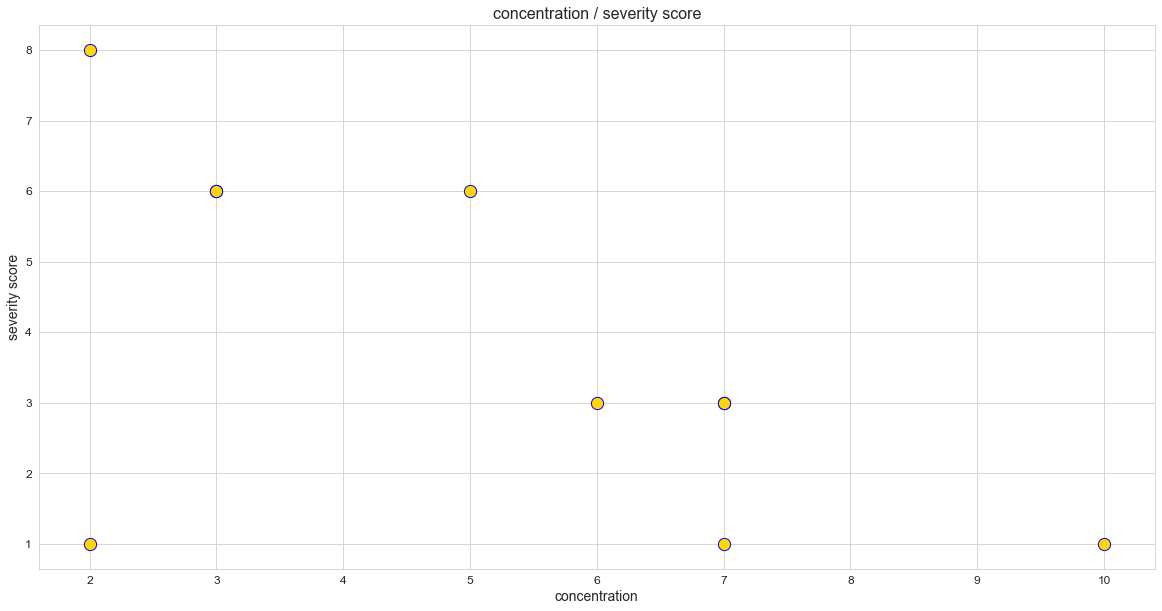

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


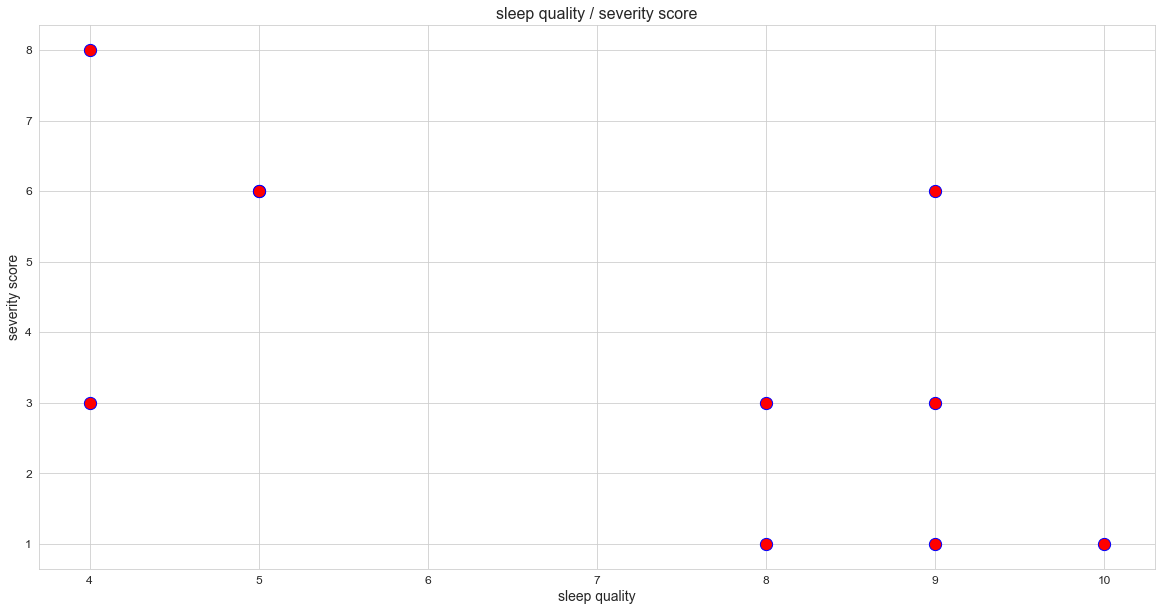

In [31]:
def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    #plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    #plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    #plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    #plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / severity score'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    #plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / severity score'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    #plt.savefig('scatter6.png')
    plt.show()
    
    plot7 = sb.scatterplot(i[6], y_var, data = df, color = 'khaki', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    #plt.savefig('scatter7.png')
    plt.show()
    
    plot8 = sb.scatterplot(i[7], y_var, data = df, color = 'gold', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    #plt.savefig('scatter8.png')
    plt.show()
    
    plot9 = sb.scatterplot(i[8], y_var, data = df, color = 'r', edgecolor = 'b', s = 150)
    plt.title('{} / severity score'.format(i[8]), fontsize = 16)
    plt.xlabel('{}'.format(i[8]), fontsize = 14)
    plt.ylabel('severity score', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    #plt.savefig('scatter9.png')
    plt.show()
    
    
scatter_df("severity score")

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


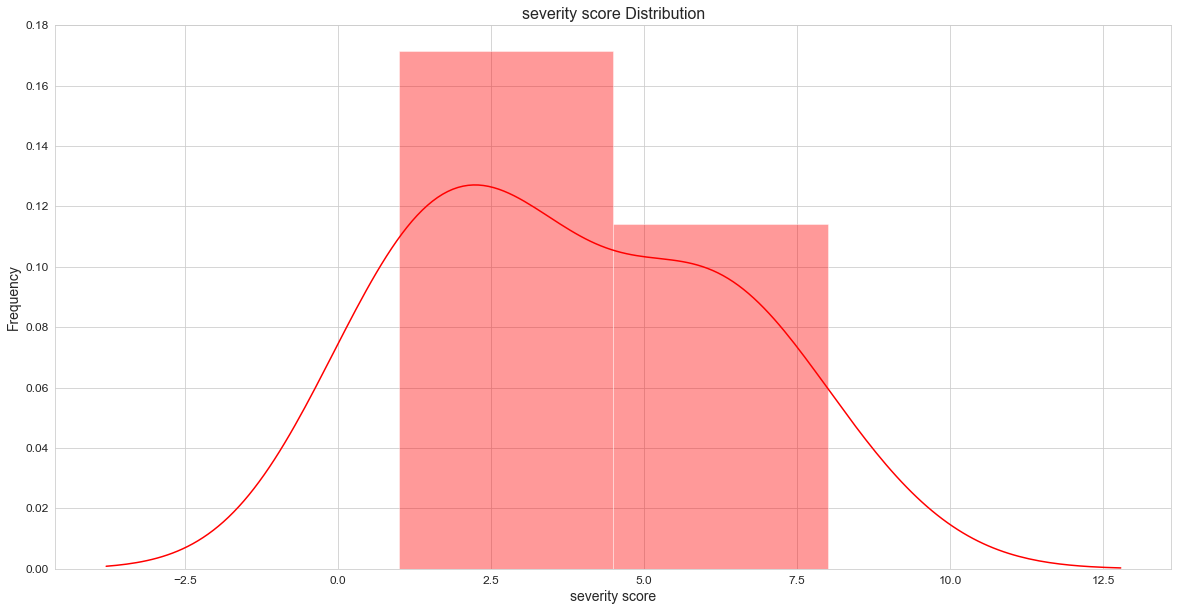

In [32]:
sb.distplot(df['severity score'], color = 'r')
plt.title('severity score Distribution', fontsize = 16)
plt.xlabel('severity score', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

# PREPARE DATA

In [12]:
X = df.drop("severity score", axis=1).values
y = df["severity score"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 

In [13]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.int64))
X_test = s_scaler.transform(X_test.astype(np.int64))

# Multiple Linear Regressions


In [14]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, df.drop('severity score',axis=1).columns, columns=['Coefficient']) 
coeff_df

4.166666666666667
[ 0.1618248   0.13907739 -0.02463052 -0.52058402  0.40429902  0.26072977
 -0.09325608 -0.59735278 -0.53854288]


,Coefficient
sexe,0.161825
age,0.139077
general health,-0.024631
ease of activity,-0.520584
breathing problem,0.404299
fatigue,0.260730
overall pain,-0.093256
concentration,-0.597353
sleep quality,-0.538543


/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

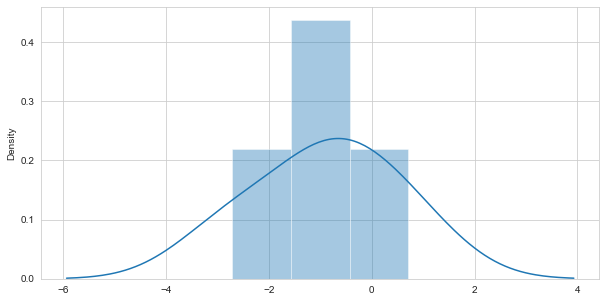

In [17]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sb.distplot(residuals)

In [18]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4 = df3.head(10)
print(df4)
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

   Actual  Predicted
0       8   8.604164
1       3   4.005962
2       1   0.288569
3       1   3.720972
MAE: 1.2606324004150211
MSE: 2.321699317856323
RMSE: 1.523712347477805
VarScore: 0.8164488610753557


# KERAS REGRESSION

In [23]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

model.compile(optimizer='Adam',loss='mse')


In [24]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

model.summary()

Epoch 1/400
1/1 [==============================] - 1s 587ms/step - loss: 20.9641 - val_loss: 18.7824
Epoch 2/400
1/1 [==============================] - 0s 28ms/step - loss: 20.8640 - val_loss: 18.7318
Epoch 3/400
1/1 [==============================] - 0s 28ms/step - loss: 20.7702 - val_loss: 18.6825
Epoch 4/400
1/1 [==============================] - 0s 37ms/step - loss: 20.6746 - val_loss: 18.6331
Epoch 5/400
1/1 [==============================] - 0s 29ms/step - loss: 20.5848 - val_loss: 18.5877
Epoch 6/400
1/1 [==============================] - 0s 29ms/step - loss: 20.4904 - val_loss: 18.5384
Epoch 7/400
1/1 [==============================] - 0s 34ms/step - loss: 20.3976 - val_loss: 18.4793
Epoch 8/400
1/1 [==============================] - 0s 30ms/step - loss: 20.3019 - val_loss: 18.4249
Epoch 9/400
1/1 [==============================] - 0s 48ms/step - loss: 20.2023 - val_loss: 18.3751
Epoch 10/400
1/1 [==============================] - 0s 39ms/step - loss: 20.0980 - val_loss: 18.327

1/1 [==============================] - 0s 44ms/step - loss: 0.0670 - val_loss: 6.4955
Epoch 165/400
1/1 [==============================] - 0s 39ms/step - loss: 0.0641 - val_loss: 6.4873
Epoch 166/400
1/1 [==============================] - 0s 47ms/step - loss: 0.0615 - val_loss: 6.4799
Epoch 167/400
1/1 [==============================] - 0s 28ms/step - loss: 0.0589 - val_loss: 6.4731
Epoch 168/400
1/1 [==============================] - 0s 53ms/step - loss: 0.0565 - val_loss: 6.4665
Epoch 169/400
1/1 [==============================] - 0s 28ms/step - loss: 0.0542 - val_loss: 6.4598
Epoch 170/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0520 - val_loss: 6.4534
Epoch 171/400
1/1 [==============================] - 0s 54ms/step - loss: 0.0499 - val_loss: 6.4472
Epoch 172/400
1/1 [==============================] - 0s 42ms/step - loss: 0.0479 - val_loss: 6.4408
Epoch 173/400
1/1 [==============================] - 0s 40ms/step - loss: 0.0460 - val_loss: 6.4340
Epoch 174/400


Epoch 246/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - val_loss: 5.9546
Epoch 247/400
1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - val_loss: 5.9522
Epoch 248/400
1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - val_loss: 5.9497
Epoch 249/400
1/1 [==============================] - 0s 35ms/step - loss: 0.0028 - val_loss: 5.9473
Epoch 250/400
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - val_loss: 5.9450
Epoch 251/400
1/1 [==============================] - 0s 51ms/step - loss: 0.0026 - val_loss: 5.9427
Epoch 252/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0025 - val_loss: 5.9404
Epoch 253/400
1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - val_loss: 5.9381
Epoch 254/400
1/1 [==============================] - 0s 28ms/step - loss: 0.0023 - val_loss: 5.9359
Epoch 255/400
1/1 [==============================] - 0s 36ms/step - loss: 0.0022 - val_loss: 5.9337


Epoch 326/400
1/1 [==============================] - 0s 27ms/step - loss: 1.0506e-04 - val_loss: 5.8551
Epoch 327/400
1/1 [==============================] - 0s 23ms/step - loss: 1.0036e-04 - val_loss: 5.8546
Epoch 328/400
1/1 [==============================] - 0s 27ms/step - loss: 9.5824e-05 - val_loss: 5.8542
Epoch 329/400
1/1 [==============================] - 0s 28ms/step - loss: 9.1467e-05 - val_loss: 5.8537
Epoch 330/400
1/1 [==============================] - 0s 23ms/step - loss: 8.7285e-05 - val_loss: 5.8533
Epoch 331/400
1/1 [==============================] - 0s 26ms/step - loss: 8.3264e-05 - val_loss: 5.8528
Epoch 332/400
1/1 [==============================] - 0s 33ms/step - loss: 7.9405e-05 - val_loss: 5.8523
Epoch 333/400
1/1 [==============================] - 0s 33ms/step - loss: 7.5705e-05 - val_loss: 5.8519
Epoch 334/400
1/1 [==============================] - 0s 24ms/step - loss: 7.2158e-05 - val_loss: 5.8515
Epoch 335/400
1/1 [==============================] - 0s 29ms/ste

<AxesSubplot:>

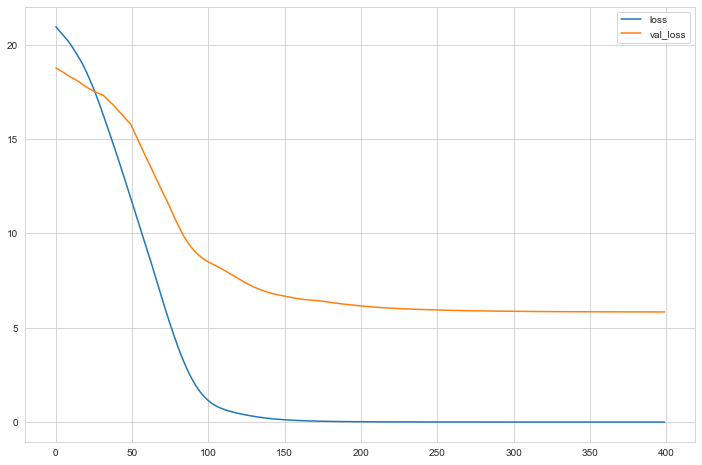

In [25]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 1.7439063787460327
MSE: 5.837574307498983
RMSE: 2.4161072632437044
VarScore: 0.5732183670825961


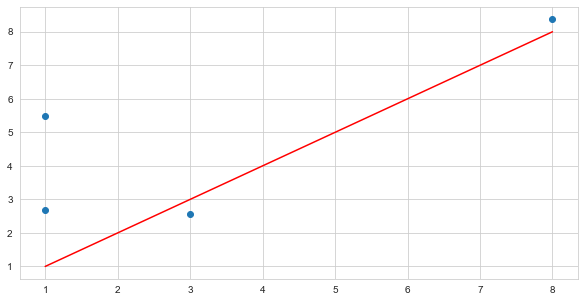

In [26]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

/Users/julesmaglione/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

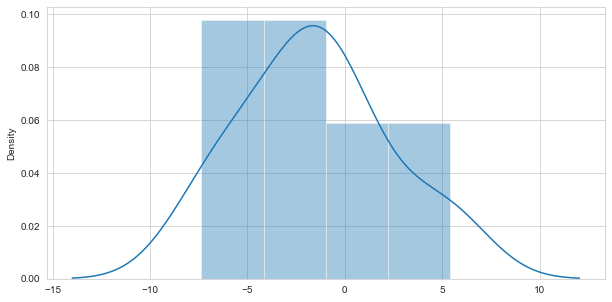

In [27]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sb.distplot(residuals)

# Create a test data

In [28]:
#generating first col
names_col = ["Julien", "Pierre", "Alice", "Corentin", "Elisa", "Danielle", "Suzanne", "Arthur", "Juliette", "Cathy"]

#names
df = pd.DataFrame(data=names_col,
                columns=["name"])

sexe_col = [0, 0, 1, 0, 1, 1, 1, 0, 1, 1]

#sexes
df1 = pd.DataFrame(data=sexe_col,
                  columns=["sexe"])

#age 
age =    [34, 67, 30, 80, 85, 70, 28, 20, 61, 38]
df2 = pd.DataFrame(data=age, 
                  columns=["age"])

#health
health =  [3, 9, 2, 1, 0, 8, 10, 4, 3, 6]
df3 = pd.DataFrame(data=health,
                  columns=["general health"]) 

#activity
activity= [1, 4, 5, 1, 7, 6, 6, 5, 2, 8]
df4 = pd.DataFrame(data=activity,
                  columns=["ease of activity"])

#breath
breath=   [4, 7, 8, 2, 3, 5, 2, 9, 7, 10]
df5 = pd.DataFrame(data=breath,
                  columns=["breathing problem"])

#fatigue 
fatigue = [10, 8, 4, 2, 7, 3, 2, 6, 6, 7]
df6 = pd.DataFrame(data=fatigue,
                  columns=["fatigue"])

#pain
pain =    [3, 7, 3, 7, 8, 9, 10, 8, 3, 0]
df7 = pd.DataFrame(data=pain,
                  columns=["overall pain"])

#concentration
concentr= [10, 7, 8, 6, 5, 5, 2, 9, 3, 4]
df8 = pd.DataFrame(data=concentr,
                  columns=["concentration"])

#sleep
sleep =   [8, 2, 1, 4, 7, 10, 3, 7, 3, 7]
df9 = pd.DataFrame(data=sleep,
                  columns=["sleep quality"])

df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)

final_tab=df[["name", "sexe", "age", "general health", 
              "ease of activity", "breathing problem", "fatigue", "overall pain", "concentration", "sleep quality"]]


X = final_tab.sample(frac=1)
X.sample(frac=1).to_csv("test_handmade.csv",index=False)